In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import sys
import random
from random import randint

In [ ]:

pagenumber = 0
urls ='https://www.tripadvisor.com/Airline_Review-d8729019-Reviews'+'-' + 'or' + str(pagenumber) + '-Allegiant-Air#REVIEWS'

headers = [{'User-Agent': 'Mozilla/5.0'}, {'User-Agent': 'Chrome/121.0'}]
response = requests.get(urls, headers=random.choice(headers))
data = []

html_content = response.content

In [ ]:

soup =  BeautifulSoup(html_content, 'html.parser')


In [ ]:
reviews = soup.find_all('div', class_='WAllg _T')
for pagenumber in range(140,160, 5):
    urls =f'https://www.tripadvisor.com/Airline_Review-d8729019-Reviews-or{pagenumber}-Allegiant-Air#REVIEWS'
    response = requests.get(urls, headers=random.choice(headers))
    html_content = response.content
    soup =  BeautifulSoup(html_content, 'html.parser')
    time.sleep(5.4)
    reviews = soup.find_all('div', class_='WAllg _T')
    print(urls)
    print(pagenumber)
    for review in reviews:
        time.sleep(randint(3,5))
        bubble = int(review.select('span')[0]['class'][1].split('_')[1])
        rating = bubble/10
        title = review.find('div', class_='KgQgP MC _S b S6 H5 _a' ).text
        review = review.find('div', class_='fIrGe _T').text
        aReview={
            'rating': rating,
            'title':title,
            'review':review
        }
        data.append(aReview)

In [ ]:
print(len(data))

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('my_data.csv')

In [ ]:
#pages 6-8 did not scrap?

Data Analysis, Roberta nlp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv('/kaggle/input/review-data/my_data.csv')
df = df.head(500)
print(df.shape)

(110, 4)


In [3]:
df.head()

,Unnamed: 0,rating,title,review
0,0,1,"Don't fall for ""Discount Airline""",Worst experience I have ever had with an airli...
1,1,1,Horrible,I will never fly with this company again. They...
2,2,1,"Awful, Awful experience. Non existent customer...","I was in Texas to attend a funeral, weather ca..."
3,3,1,Horrible experience,"Our flight was to take off Mon 1/15 at 12:20, ..."
4,4,1,Terrible airline hires terrible people.,terrible customer service. After buying a whol...


In [4]:
df.rename(columns={"Unnamed:0": "ID"}, inplace=True)


In [5]:
df.columns=["Id", "rating", "title", "review"]
df

,Id,rating,title,review
0,0,1,"Don't fall for ""Discount Airline""",Worst experience I have ever had with an airli...
1,1,1,Horrible,I will never fly with this company again. They...
2,2,1,"Awful, Awful experience. Non existent customer...","I was in Texas to attend a funeral, weather ca..."
3,3,1,Horrible experience,"Our flight was to take off Mon 1/15 at 12:20, ..."
4,4,1,Terrible airline hires terrible people.,terrible customer service. After buying a whol...
...,...,...,...,...
105,145,3,Rude Flight Attendants,The flight attendants were extremely rude. The...
106,146,1,Cheap Airline - not customer-driven. No refund...,Unfortunately due to unforeseen circumstances ...
107,147,5,First Time and won't be the last.,First time flying with the airline and it coul...
108,148,1,Avoid Allegiant air at ALL COST,CUSTOMER SERVICE SUCKS!!!! Luggage never came ...


# EDA

In [ ]:
pip install twython

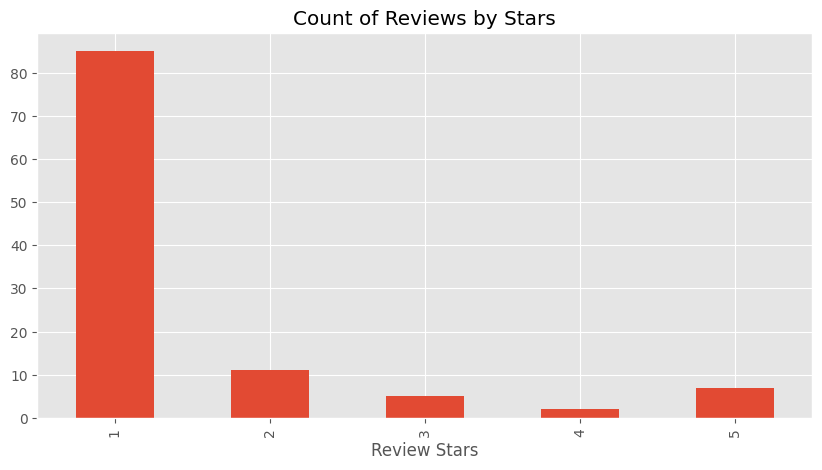

In [6]:
ax = df['rating'].value_counts().sort_index().plot(kind = 'bar', title='Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
test1 = df ['title'][50]
print(test1)
test2 = df ['review'][50]
print(test2)

Poor check-in.
Been in line for over an hour JUST to check my baggage.  This is absolutely ridiculous.  No staff.  


**reading properly**

In [8]:
tokens1 = nltk.word_tokenize(test1)
tokens1[:10]

['Poor', 'check-in', '.']

In [9]:
tokens2 = nltk.word_tokenize(test2)
tokens2[:10]

['Been', 'in', 'line', 'for', 'over', 'an', 'hour', 'JUST', 'to', 'check']

#Tokenization working

In [10]:
tagged = nltk.pos_tag(tokens2)
tagged[:10]
#Tagging works

[('Been', 'NNP'),
 ('in', 'IN'),
 ('line', 'NN'),
 ('for', 'IN'),
 ('over', 'IN'),
 ('an', 'DT'),
 ('hour', 'NN'),
 ('JUST', 'NNP'),
 ('to', 'TO'),
 ('check', 'VB')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
#Chunking works

(S
  (GPE Been/NNP)
  in/IN
  line/NN
  for/IN
  over/IN
  an/DT
  hour/NN
  JUST/NNP
  to/TO
  check/VB
  my/PRP$
  baggage/NN
  ./.
  This/DT
  is/VBZ
  absolutely/RB
  ridiculous/JJ
  ./.
  No/DT
  staff/NN
  ./.)


# roBERTa modeling

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
sia.polarity_scores(test2)

{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.6453}

In [15]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [17]:
encoded_text = tokenizer(test2, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' :scores [0],
    'roberta_nue' :scores [1],
    'roberta_pos' :scores [2]
}
print(scores_dict)

{'roberta_neg': 0.96238106, 'roberta_nue': 0.033336855, 'roberta_pos': 0.004282112}


In [23]:
def polarity_scores_roberta(test2):
        encoded_text = tokenizer(test2, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        scores_dict = {
        'roberta_neg' :scores [0],
        'roberta_nue' :scores [1],
        'roberta_pos' :scores [2]
    }
        return scores_dict

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
       text = row['review']
       myid = row['Id']
       vader_result = sia.polarity_scores(text)
       vader_result_rename = {}
       for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
       roberta_results = polarity_scores_roberta(text)
       both = {**vader_result_rename, **roberta_results} 
       res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/110 [00:00<?, ?it/s]

In [25]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how = 'left')

In [26]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_nue', 'roberta_pos', 'rating', 'title',
       'review'],
      dtype='object')

In [27]:
results_df['Sentiment_Total']=-results_df['roberta_neg']+results_df['roberta_pos']

In [28]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_nue,roberta_pos,rating,title,review,Sentiment_Total
0,0,0.192,0.755,0.053,-0.7506,0.945515,0.049844,0.004641,1,"Don't fall for ""Discount Airline""",Worst experience I have ever had with an airli...,-0.940874
1,1,0.046,0.898,0.056,0.1280,0.971379,0.025511,0.003110,1,Horrible,I will never fly with this company again. They...,-0.968269
2,2,0.127,0.873,0.000,-0.6908,0.638927,0.333598,0.027475,1,"Awful, Awful experience. Non existent customer...","I was in Texas to attend a funeral, weather ca...",-0.611452
3,3,0.127,0.826,0.046,-0.5719,0.866030,0.123939,0.010031,1,Horrible experience,"Our flight was to take off Mon 1/15 at 12:20, ...",-0.855999
4,4,0.102,0.853,0.044,-0.5267,0.878143,0.109214,0.012642,1,Terrible airline hires terrible people.,terrible customer service. After buying a whol...,-0.865501
...,...,...,...,...,...,...,...,...,...,...,...,...
105,145,0.084,0.916,0.000,-0.5095,0.963014,0.033681,0.003304,3,Rude Flight Attendants,The flight attendants were extremely rude. The...,-0.959710
106,146,0.091,0.909,0.000,-0.5267,0.903058,0.091618,0.005324,1,Cheap Airline - not customer-driven. No refund...,Unfortunately due to unforeseen circumstances ...,-0.897734
107,147,0.077,0.923,0.000,-0.4401,0.024584,0.154650,0.820766,5,First Time and won't be the last.,First time flying with the airline and it coul...,0.796182
108,148,0.000,0.946,0.054,0.3855,0.936888,0.056840,0.006272,1,Avoid Allegiant air at ALL COST,CUSTOMER SERVICE SUCKS!!!! Luggage never came ...,-0.930617


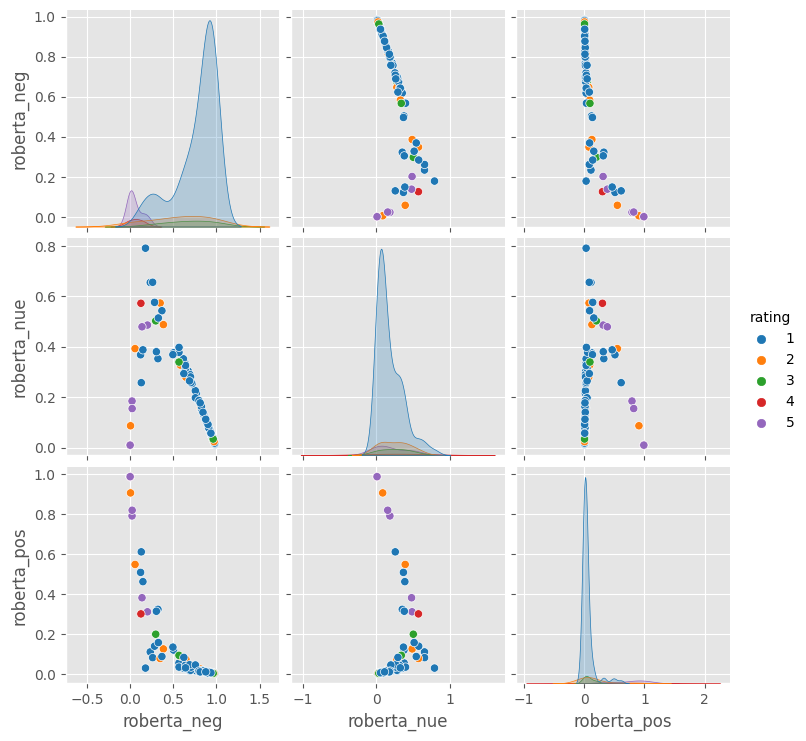

In [29]:
sns.pairplot(data=results_df, vars = ['roberta_neg', 'roberta_nue', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [30]:
results_df[['Sentiment_Total']] = results_df[['Sentiment_Total']].apply(pd.to_numeric)

In [34]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

In [36]:
text=results_df.review[0]
wordcloud = WordCloud().generate(text)

In [37]:
word_string=" ".join(df['review'].str.lower())

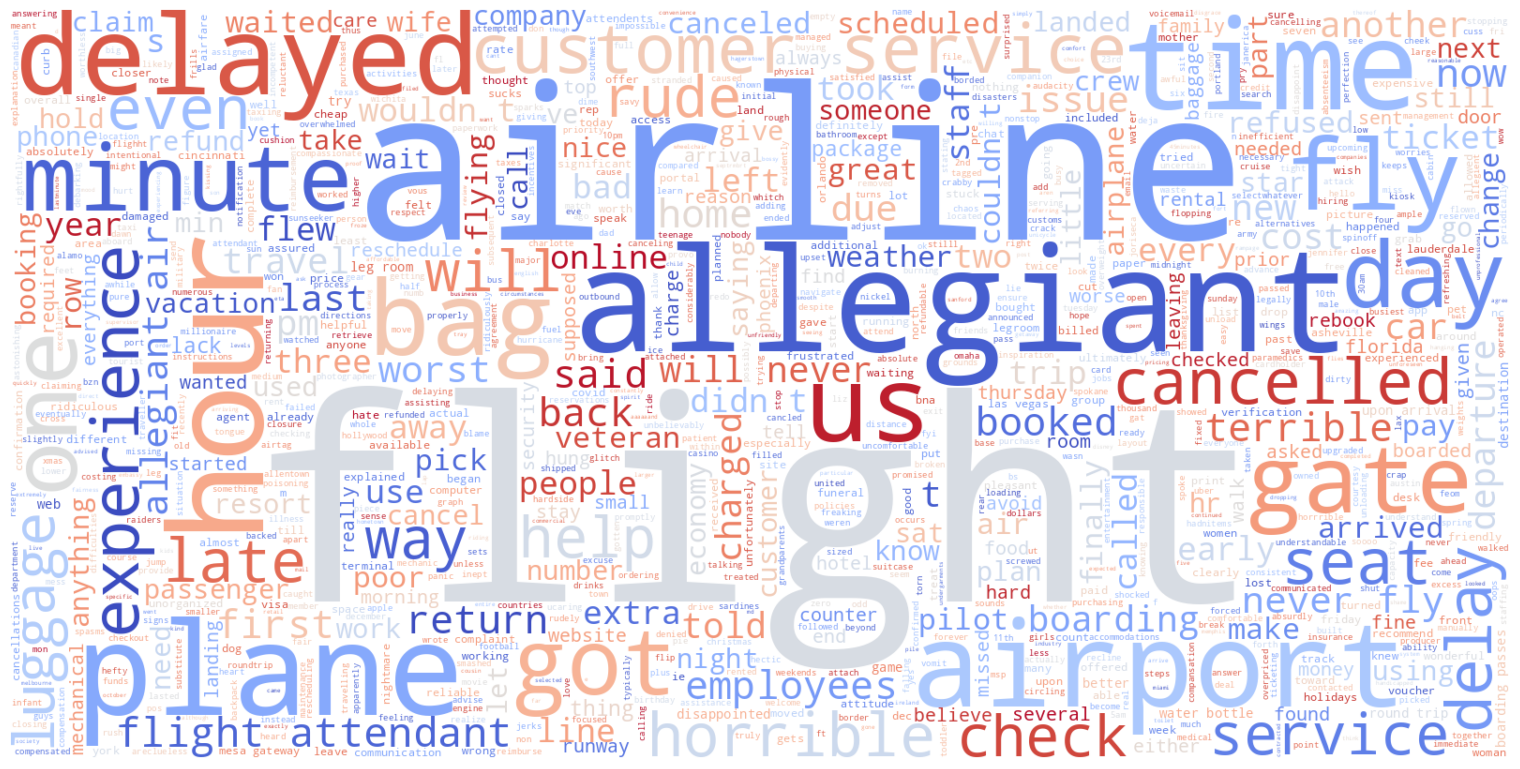

In [40]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'coolwarm_r' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0) 

plt.show() 

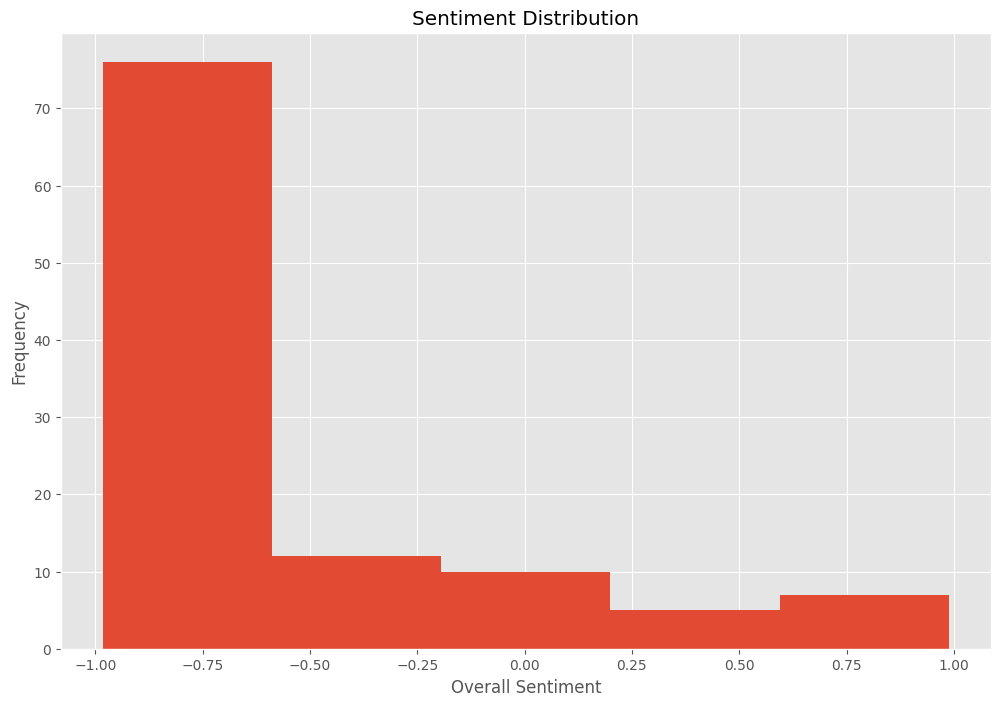

In [47]:
hist = results_df.hist(column='Sentiment_Total', figsize=[12, 8], bins=5) 
plt.ylabel('Frequency')
plt.xlabel('Overall Sentiment')
plt.title('Sentiment Distribution')
plt.show() 